## Predicting Stress and Sleep Disorders Using Health and Lifestyle Data



# Team :-
### Shanmukha Sri Krishna
### Bhupati Varun
### Vishnu Shreeram

In [39]:
import pandas as pd
import numpy as np

# Loading Dataset
To load the dataset, we can use the `read_csv()` function from the pandas library :

```
python
df_part1 = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df_part2 = pd.read_csv('./Sleep_health_and_lifestyle_dataset_part_2.csv')
```
These two lines of code will load the dataset from the CSV files `Sleep_health_and_lifestyle_dataset.csv` and `Sleep_health_and_lifestyle_dataset_part_2.csv` respectively and store them in the variables `df_part1` and `df_part2`.


In [40]:
df_part1 = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
df_part2 = pd.read_csv('./Sleep_health_and_lifestyle_dataset_part_2.csv')

# Merging two parts of the dataset to create a single one

In [41]:
df = pd.concat((df_part1, df_part2))
print(df.shape)
df.head()

(560, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Exploring the data set

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                560 non-null    int64  
 1   Gender                   560 non-null    object 
 2   Age                      560 non-null    int64  
 3   Occupation               560 non-null    object 
 4   Sleep Duration           560 non-null    float64
 5   Quality of Sleep         560 non-null    int64  
 6   Physical Activity Level  560 non-null    int64  
 7   Stress Level             560 non-null    int64  
 8   BMI Category             560 non-null    object 
 9   Blood Pressure           560 non-null    object 
 10  Heart Rate               560 non-null    int64  
 11  Daily Steps              560 non-null    int64  
 12  Sleep Disorder           185 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 61.2+ KB


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,280.167857,40.021429,7.115893,7.275000,58.787500,5.458929,70.178571,6821.071429
std,161.418024,8.132153,0.742655,1.134631,19.955394,1.676447,3.873247,1527.465518
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,140.750000,33.000000,6.500000,6.000000,45.000000,4.000000,68.000000,5500.000000
50%,280.500000,38.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,419.250000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,559.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Dropping Irrelevant Feature Person ID

In [6]:
df.drop('Person ID', axis=1, inplace=True)

# Handling NA values  

In [7]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             375
dtype: int64

### NA values found in 'Sleep Disorder' indicates that the person doesn't have any sleep disorders, so instead of treating it as NA value we will assign 'None' to it

In [8]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [9]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [43]:
# print the columns and their allowable values
for col in df.columns:
    print(col, df[col].unique())
    

Person ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 

In [10]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
181,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
182,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
183,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
184,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia


## Handling the 'Blood Pressure' column by splitting it into Diastolic Pressure and Systolic Pressure

In [11]:
lowRow = []
highRow = []


for val in df['Blood Pressure']:
    sp = val.split('/')

    highRow.append(int(sp[0]))
    lowRow.append(int(sp[1]))

df['Diastolic Pressure'] = np.array(lowRow)
df['Systolic Pressure'] = np.array(highRow)


In [12]:
df = df.drop('Blood Pressure', axis = 1)

In [13]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Diastolic Pressure,Systolic Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,83,126
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,80,125
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,80,125
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,90,140
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,90,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,Insomnia,90,135
182,Male,43,Salesperson,6.5,6,45,7,Overweight,72,6000,Insomnia,85,130
183,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,Insomnia,90,135
184,Male,43,Salesperson,6.4,6,45,7,Overweight,72,6000,Insomnia,85,130


## Using LabelEncoders to Encode the Categorical Data
#### We also store a dictionay of encoders so that we can also Transform the unseen data into the same format

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
catData = [key for key in df if (df[key].dtype == object)]
numData = [key for key in df if (df[key].dtype != object and key != 'Stress Level')]
print('categorical features are :',catData)

categorical features are : ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


In [16]:
label_encoding_dict = {}
for category in catData:
    labelEncoder = LabelEncoder()
    labelEncoder.fit(df[category])
    df[category] = labelEncoder.transform(df[category])
    label_encoding_dict[category] = labelEncoder
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Diastolic Pressure,Systolic Pressure
0,1,27,9,6.1,6,42,6,3,77,4200,1,83,126
1,1,28,1,6.2,6,60,8,0,75,10000,1,80,125
2,1,28,1,6.2,6,60,8,0,75,10000,1,80,125
3,1,28,6,5.9,4,30,8,2,85,3000,2,90,140
4,1,28,6,5.9,4,30,8,2,85,3000,2,90,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0,43,10,6.7,7,45,4,3,65,6000,0,90,135
182,1,43,7,6.5,6,45,7,3,72,6000,0,85,130
183,0,43,10,6.7,7,45,4,3,65,6000,0,90,135
184,1,43,7,6.4,6,45,7,3,72,6000,0,85,130


# Distribution of target features

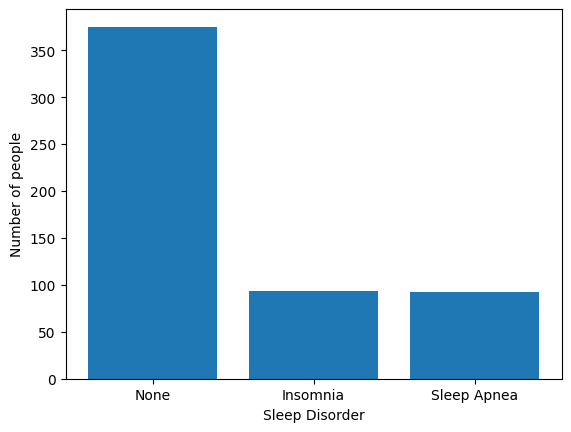

In [17]:
import matplotlib.pyplot as plt
count=df['Sleep Disorder'].value_counts()
plt.bar(label_encoding_dict['Sleep Disorder'].inverse_transform(count.keys()),count)
plt.xlabel('Sleep Disorder')
plt.ylabel('Number of people')
plt.show()

# Boxplot of Features

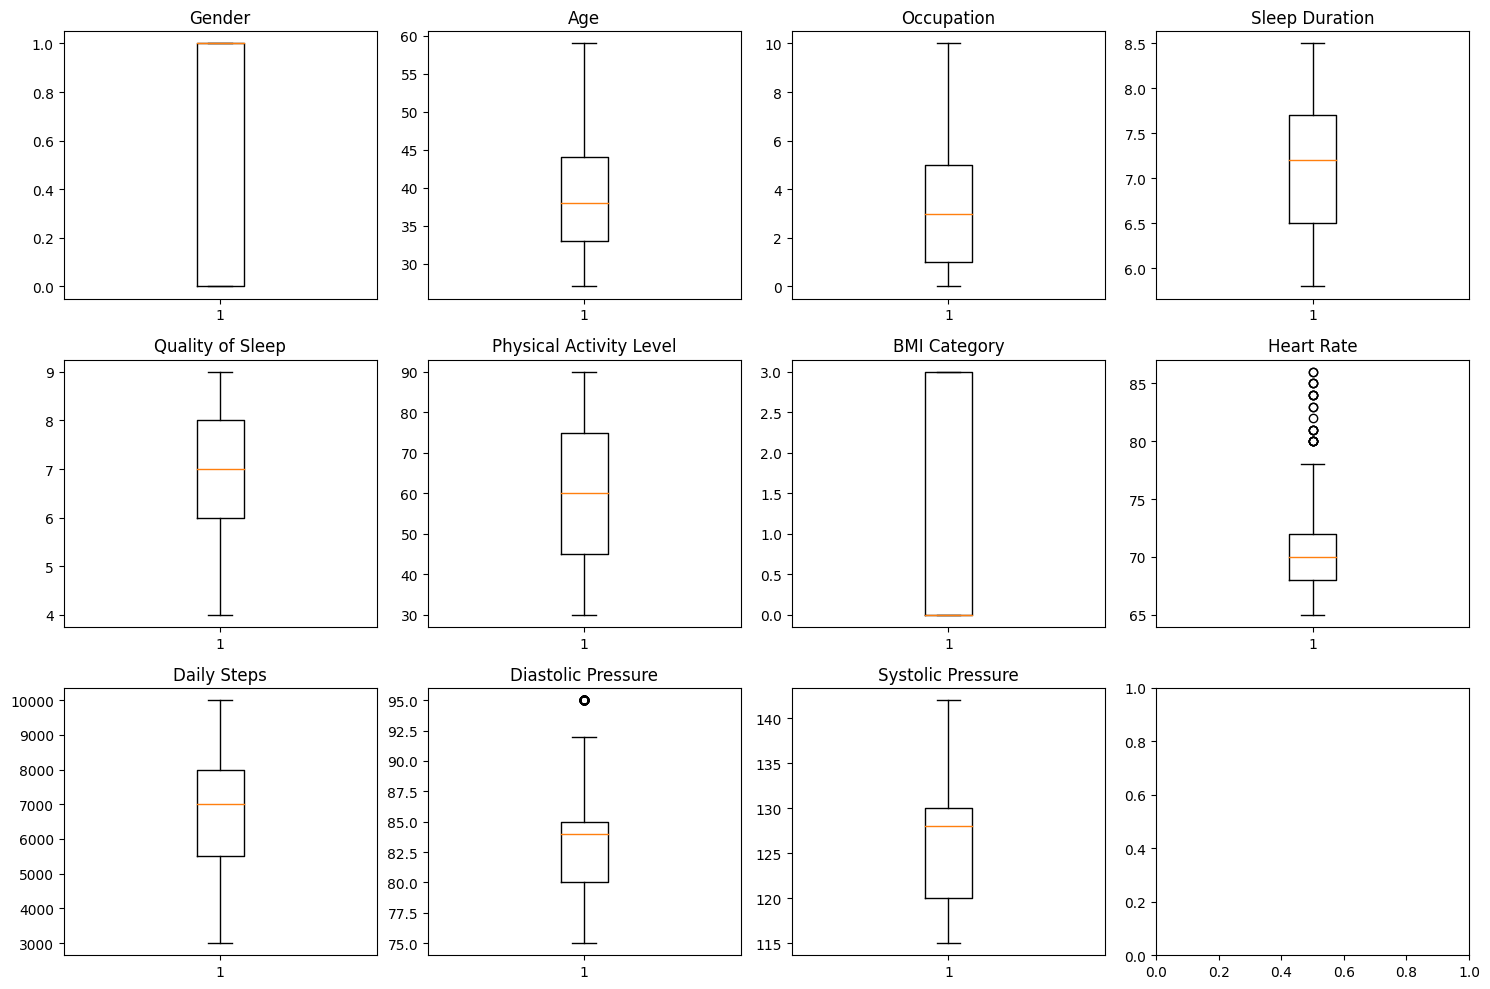

In [18]:
import matplotlib.pyplot as plt

columns = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Diastolic Pressure', 'Systolic Pressure']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, column in enumerate(columns):
    ax = axes[i // 4, i % 4]
    ax.boxplot(df[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

## Correlation analysis

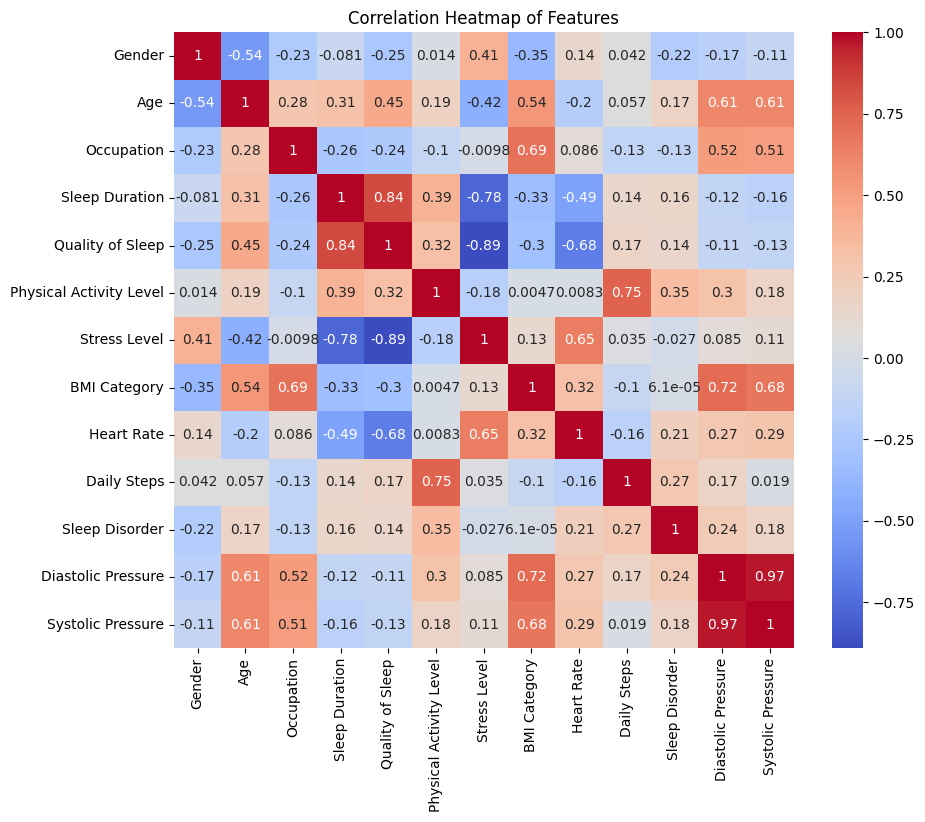

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

The correlation heatmap provides insights into the relationships between different features in the dataset
From the above heatmap, we can see that :-
- Systolic and Diastolic Pressures are highly correlated (+ve)
- Quality of Sleep and Sleep duration (+ve )
- Stress level and Quality of sleep / Sleep duaration (-ve)
- Daily steps and physical activity level (+ve)

# Standardisation of Data

In [20]:
numData

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Heart Rate',
 'Daily Steps',
 'Diastolic Pressure',
 'Systolic Pressure']

In [21]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
for f in numData:
    df[f] = StandardScaler().fit_transform(df[[f]])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Diastolic Pressure,Systolic Pressure
0,1,-1.602659,9,-1.369144,-1.124718,-0.842003,6,3,1.762740,-1.717495,1,-0.083242,-0.131326
1,1,-1.479581,1,-1.234372,-1.124718,0.060815,8,0,1.245916,2.083039,1,-0.603121,-0.263836
2,1,-1.479581,1,-1.234372,-1.124718,0.060815,8,0,1.245916,2.083039,1,-0.603121,-0.263836
3,1,-1.479581,6,-1.638689,-2.888981,-1.443882,8,2,3.830037,-2.503813,2,1.129807,1.723805
4,1,-1.479581,6,-1.638689,-2.888981,-1.443882,8,2,3.830037,-2.503813,2,1.129807,1.723805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0,0.366598,10,-0.560509,-0.242586,-0.691534,4,3,-1.338206,-0.538019,0,1.129807,1.061258
182,1,0.366598,7,-0.830054,-1.124718,-0.691534,7,3,0.470679,-0.538019,0,0.263343,0.398711
183,0,0.366598,10,-0.560509,-0.242586,-0.691534,4,3,-1.338206,-0.538019,0,1.129807,1.061258
184,1,0.366598,7,-0.964827,-1.124718,-0.691534,7,3,0.470679,-0.538019,0,0.263343,0.398711


# Building Regression models for Stress level Prediction

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Regression
tgt1 = df['Stress Level']
feat1 = df.drop(columns = ['Stress Level','Sleep Disorder'])


In [23]:
feat1

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Diastolic Pressure,Systolic Pressure
0,1,-1.602659,9,-1.369144,-1.124718,-0.842003,3,1.762740,-1.717495,-0.083242,-0.131326
1,1,-1.479581,1,-1.234372,-1.124718,0.060815,0,1.245916,2.083039,-0.603121,-0.263836
2,1,-1.479581,1,-1.234372,-1.124718,0.060815,0,1.245916,2.083039,-0.603121,-0.263836
3,1,-1.479581,6,-1.638689,-2.888981,-1.443882,2,3.830037,-2.503813,1.129807,1.723805
4,1,-1.479581,6,-1.638689,-2.888981,-1.443882,2,3.830037,-2.503813,1.129807,1.723805
...,...,...,...,...,...,...,...,...,...,...,...
181,0,0.366598,10,-0.560509,-0.242586,-0.691534,3,-1.338206,-0.538019,1.129807,1.061258
182,1,0.366598,7,-0.830054,-1.124718,-0.691534,3,0.470679,-0.538019,0.263343,0.398711
183,0,0.366598,10,-0.560509,-0.242586,-0.691534,3,-1.338206,-0.538019,1.129807,1.061258
184,1,0.366598,7,-0.964827,-1.124718,-0.691534,3,0.470679,-0.538019,0.263343,0.398711


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
scoreList = []

for i in range(1, 5):

    poly = PolynomialFeatures(i)
    x = poly.fit_transform(feat1)

    X_train, X_test, y_train, y_test = train_test_split(x, np.array(tgt1), random_state = 42)

    model = LinearRegression()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)

    scoreList.append(r2_score(y_test, pred))

scoreList

[0.9589391758935646,
 0.8252580879848644,
 0.9365664861391231,
 0.38746335763191364]

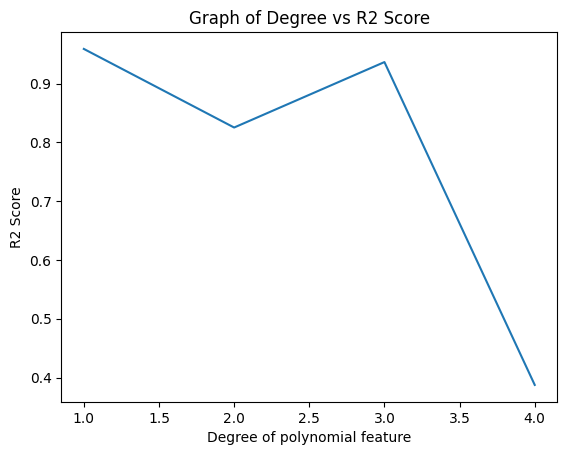

In [26]:
xList = [i for i in range(1, 5)]

plt.xlabel("Degree of polynomial feature")
plt.ylabel("R2 Score")
plt.title("Graph of Degree vs R2 Score")
plt.plot(xList, scoreList)
plt.show()

# From the above plot, we select the degree of polynomial features as 3

In [27]:
poly = PolynomialFeatures(3)
x = poly.fit_transform(feat1)

X_train, X_test, y_train, y_test = train_test_split(x, np.array(tgt1), random_state = 42)

model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('r2_score =',r2_score(y_test, pred))
print('mean_squared_error =',mean_squared_error(y_test, pred))

r2_score = 0.9365664861391231
mean_squared_error = 0.18911925420716047


## Classification

In [28]:
X = df.drop(columns=['Stress Level','Sleep Disorder'])
y = df['Sleep Disorder']

# Building Models for Classification of Sleep Disorders

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
clf = SVC(kernel ='linear')
 # training set in x, y axis
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Classification Report',classification_report(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.96      0.99      0.98       111
           2       0.93      0.87      0.90        30

    accuracy                           0.95       168
   macro avg       0.94      0.92      0.93       168
weighted avg       0.95      0.95      0.95       168



In [31]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Classification Report',classification_report(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.96      0.99      0.98       111
           2       0.93      0.87      0.90        30

    accuracy                           0.95       168
   macro avg       0.94      0.92      0.93       168
weighted avg       0.95      0.95      0.95       168



#Using over sampling method SMOTE to balance the data

In [32]:
from collections import Counter
cc = Counter(y_train)

# Checking for imbalanced data
cc

Counter({1: 264, 0: 66, 2: 62})

In [33]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [36]:
# Bad news, we actually have a large amount of imbalanced data
# So using a imbalanced learn method helps us to predict good observations
# Using SMOTE: Synthetic Minority Oversampling Technique

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Checking for balanced data in new target
cc = Counter(y_smote)
cc

## Using Undersampling Method

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_clc, y_clc = cc.fit_resample(X_train, y_train)


SyntaxError: invalid syntax (2761645355.py, line 1)

In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold

clc = InstanceHardnessThreshold()
X_clc, y_clc = clc.fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
cc = Counter(y_clc)
cc

# Using Randomized search CV

## Intial Data

In [ ]:
from scipy.stats import uniform

gammaValues = ['scale', 'auto']

cvals = [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10]

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(1e-5, 10),
    'degree': [i for i in range(1, 20)],
    'gamma': gammaValues,
    'decision_function_shape': ['ovo', 'ovr']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

base_clf = SVC()
rand_clf = RandomizedSearchCV(base_clf, param_distributions = param_grid)

rand_clf.fit(X_train, y_train)

In [ ]:
rand_clf.best_params_

In [ ]:
# Printing the classification report for the randomized search hyper parameter tuned model

y_pred = rand_clf.predict(X_test)

print("The classification report after using randomized search CV\n", classification_report(y_test, y_pred))

In [ ]:
# Printing the confusion matrix for the randomized search hyper parameter tuned model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# Randomized search CV for SMOTE

In [ ]:
base_clf = SVC()
rand_clf = RandomizedSearchCV(base_clf, param_distributions = param_grid)

rand_clf.fit(X_clc, y_clc)

In [ ]:
rand_clf.best_params_

In [ ]:
# Printing the classification report for the randomized search hyper parameter tuned model

y_pred = rand_clf.predict(X_test)

print("The classification report after using randomized search CV\n", classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

# RandomizedSearchCV for Under Sampled Data

In [ ]:
base_clf = SVC()
rand_clf = RandomizedSearchCV(base_clf, param_distributions = param_grid, verbose = 3)

rand_clf.fit(X_smote, y_smote)

In [ ]:
rand_clf.best_params_

In [ ]:
y_pred = rand_clf.predict(X_test)

print("The classification report after using randomized search CV\n", classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

#Using GridSearchCV for hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

gammaValues = ['scale', 'auto']

cvals = [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10]

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': cvals,
    'degree': [i for i in range(1, 5)],
    'gamma': gammaValues,
    'decision_function_shape': ['ovo', 'ovr']
}

base_clf = SVC()
grid_clf = GridSearchCV(base_clf, param_grid = param_grid, verbose = 3)

grid_clf.fit(X_train, y_train)


In [ ]:
# Finding the best parameters for the gridsearch CV
grid_clf.best_params_

In [ ]:
# Using the test data to make predictions on the input
y_pred = grid_clf.predict(X_test)

In [ ]:
print('Classification Report after using grid search CV\n', classification_report(y_pred = y_pred, y_true = y_test))

In [ ]:


print("The confusion matrix is as follows")
confusion_matrix(y_test, y_pred)

## Using SMOTE samples for GridSearchCV


In [ ]:
base_clf = SVC()
grid_clf = GridSearchCV(base_clf, param_grid = param_grid, verbose = 3)

grid_clf.fit(X_smote, y_smote)

In [ ]:
grid_clf.best_params_

In [ ]:
y_pred = grid_clf.predict(X_test)

print('Classification Report after using grid search CV on SMOTE data\n', classification_report(y_pred = y_pred, y_true = y_test))

In [ ]:
confusion_matrix(y_pred = y_pred, y_true = y_test)

# Using GridSearchCV for Under Sampled data

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': cvals,
    'degree': [i for i in range(1, 5)],
    'gamma': gammaValues,
    'decision_function_shape': ['ovo', 'ovr']
}

In [ ]:
base_clf = SVC()
grid_clf = GridSearchCV(base_clf, param_grid = param_grid, verbose = 3)

grid_clf.fit(X_clc, y_clc)

In [ ]:
grid_clf.best_params_

In [ ]:
y_pred = grid_clf.predict(X_test)

print('Classification Report after using grid search CV on SMOTE data\n', classification_report(y_pred = y_pred, y_true = y_test))

In [ ]:
confusion_matrix(y_true = y_test, y_pred = y_pred)

# Visualising clusters using Principal Component Analysis (PCA and Kernel PCA)

In [ ]:
from sklearn.decomposition import PCA
label_encoding_dict['Sleep Disorder'].classes_

In [ ]:
features = [key for key in df if (key != 'Sleep Disorder' and key != 'Stress Level')]
# ['Insomnia', 'None', 'Sleep Apnea'] the labels associated with 0,1,2
pca = PCA(n_components=len(features))
df_full_pca = pca.fit_transform(df[features])
labels = label_encoding_dict['Sleep Disorder'].classes_
colors = ['r', 'g', 'b']

for i, label in enumerate(labels):
    plt.scatter(df_full_pca[df['Sleep Disorder'] == i, 0],
                df_full_pca[df['Sleep Disorder'] == i, 1],
                label=label,
                color=colors[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sleep Disorder')
plt.legend()
plt.show()

## Visualising Explained Variance Ratio vs Number of Components, & finding the optimal number of components

In [ ]:
# explained variance ratio graph
plt.plot([i+1 for i in range(len(pca.explained_variance_ratio_)) ],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
# show all the ticks in x-axis
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))])
# show the points in the graph with x,y values
for i in range(len(pca.explained_variance_ratio_)):
    plt.text(i+1, np.cumsum(pca.explained_variance_ratio_)[i], f'({i+1}, {np.cumsum(pca.explained_variance_ratio_)[i]:.2f})', fontsize=6
             , verticalalignment='bottom', horizontalalignment='right')
    plt.grid()
plt.show()

## From here we can see that at Number of Components = 5, it has achieved 91% of cumulative variance ratio. So we would try the classification using the new 5 components

In [ ]:
features = [key for key in df if (key != 'Sleep Disorder' and key != 'Stress Level')]
new_pca = PCA(n_components=5)
new_pca.fit(df[features])
new_points = new_pca.transform(df[features])

In [ ]:
X = df.drop(columns=['Stress Level','Sleep Disorder'])
y = df['Sleep Disorder']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import classification_report

# {'C': 8.430136277531556,
#  'decision_function_shape': 'ovr',
#  'degree': 4,
#  'gamma': 'auto',
#  'kernel': 'rbf'}





clf = SVC(kernel='rbf',degree=4,C=8.430136277531556,gamma='auto',decision_function_shape='ovr') # found 11 through various trial

 # training set in x, y axis
clf.fit(new_pca.transform(X_train),y_train)
y_pred = clf.predict(new_pca.transform(X_test))

print('Classification Report',classification_report(y_test,y_pred))

#using ensemble methods for imporving accuracy and reduce overfitting


In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y2 = df['Sleep Disorder']
y = df['Stress Level']

# Ensembles for Regression

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(estimator=SVR(),
                        n_estimators=80, random_state=0).fit(X_train, y_train)
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_squared_error
print('mean squared error' , mean_squared_error(y_test,y_pred))

In [ ]:

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)


y_pred_reg = rf_regressor.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

# Calculate the differences (residuals)
residuals = y_test - y_pred_reg

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), y_test, label="Actual", color='blue', marker='o', alpha=0.7)
plt.scatter(range(len(residuals)), y_pred_reg, label="Predicted", color='red', marker='o', alpha=0.7)

plt.axhline(0, color='black', linestyle='--', lw=2)  # Add a horizontal line at y=0 for reference
plt.xlabel("Index")
plt.ylabel("Difference in Stress Level")
plt.title("Difference between Actual and Predicted Stress Level")
plt.legend()
plt.show()


print("mse_reg",mse_reg)
print("r2_reg",r2_reg)


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(residuals)), residuals, label="Predicted", color='purple', marker='o', alpha=0.6)
plt.xlabel("Index")
plt.ylabel("Difference in Stress Level")
plt.title("Difference between Actual and Predicted Stress Level")

plt.show()


# classification using Ensembles

In [ ]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y2, test_size=0.2, random_state=42)


In [ ]:
# 3. Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_clf, y_train_clf)

# 4. Predict on the test set
y_pred_clf = rf_classifier.predict(X_test_clf)

# 5. Calculate classification metrics
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)

# 6. Confusion matrix
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix for Sleep Disorder Classification")
plt.show()

print(f"Classification Accuracy: {accuracy_clf}")
print('confusion_matrix \n',conf_matrix)
# Explanation of Corrections:

## Finding the best n_estimators for Random Forest Classifier


In [ ]:
l2 = []
for  i in range(1,80):
    rf_classifier = RandomForestClassifier(n_estimators=i,random_state=42)
    rf_classifier.fit(X_train_clf, y_train_clf)

    # 4. Predict on the test set
    y_pred_clf = rf_classifier.predict(X_test_clf)

    # 5. Calculate classification metrics
    accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
    l2.append(accuracy_clf)
plt.plot(range(1,80),l2)
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.show()

In [ ]:
# choosing various ensemble methods for regression and classification

In [ ]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

from xgboost import XGBRegressor, XGBClassifier


# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train ensemble regressors
regressors = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Bagging": BaggingRegressor(estimator=RandomForestRegressor(), random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Evaluate each regressor
for name, model in regressors.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"{name} Regressor - MSE: {mse:.4f}, R2 Score: {r2:.4f}")
    residuals = y_test_reg - y_pred_reg

    # Plot the residuals
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(residuals)), residuals, label="Difference (Actual - Predicted)", color='purple', marker='o', alpha=0.7)
    plt.axhline(0, color='black', linestyle='--', lw=2)  # Add a horizontal line at y=0 for reference
    plt.xlabel("Index")
    plt.ylabel("Difference in Stress Level")
    plt.title(f"Difference between Actual and Predicted Stress Level {name}")
    plt.legend()
    plt.show()


### The best Ensemble Regressor is XG Boost

In [ ]:


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y2, test_size=0.2, random_state=42)

# Define and train ensemble classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=40,random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(estimator=RandomForestClassifier(), random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# Evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred_clf = model.predict(X_test_clf)
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    print(f"{name} Classifier - Accuracy: {accuracy:.4f}")

    # Confusion Matrix for each classifier
    conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
    ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {name} Classifier")
    plt.show()

## The best Ensemble Classifier are Random Forest, Gradient Boosting and XG Boost

# precision recall graphs


In [ ]:
from sklearn.preprocessing import label_binarize
y=df['Sleep Disorder']
# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), SVC(random_state= 42))
)
classifier.fit(X_train2, Y_train2)
y_score = classifier.decision_function(X_test2)

from sklearn.metrics import average_precision_score, precision_recall_curve

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(Y_test2[:, i] , y_score[:, i])
    average_precision[i] = average_precision_score(Y_test2[:, i] , y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test2.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test2 , y_score, average="micro")

from collections import Counter
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
    prevalence_pos_label=Counter(Y_test2.ravel())[1] / Y_test2.size,
)
display.plot(plot_chance_level=True)
_ = display.ax_.set_title("Micro-averaged over all classes")

In [ ]:
from itertools import cycle

import matplotlib.pyplot as plt

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()